# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [37]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [38]:
data = pd.read_csv("weight-height.csv")
data.sample(5)

,Gender,Height,Weight
9652,Female,65.264795,156.209802
2879,Male,69.368221,187.333481
6103,Female,66.847585,165.272511
2664,Male,70.330213,185.588740
5516,Female,67.303405,165.018630


In [39]:
male_df = data.loc[data["Gender"] == "Male"]
female_df = data.loc[data["Gender"] == "Female"]

print("Male Height mean:", male_df.Height.mean())
print("Male Height sd:", male_df.Height.std())

print("Male Weight mean:", male_df.Weight.mean())
print("Male Height sd:", male_df.Weight.std())

print("Female Height mean:", female_df.Height.mean())
print("Female Height sd:", female_df.Height.std())

print("Female Weight mean:", female_df.Weight.mean())
print("Female Height sd:", female_df.Weight.std())
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Height sd: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Height sd: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

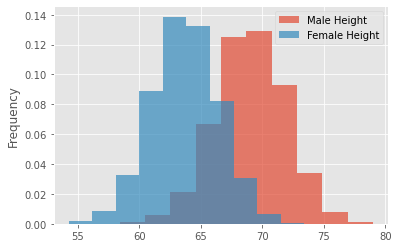

In [40]:
binsize=10
ax = male_df.Height.plot.hist(bins=binsize, density=True, alpha=0.7, label="Male Height")
ax = female_df.Height.plot.hist(bins=binsize, density=True, alpha=0.7, label="Female Height")
plt.legend()
plt.show()

In [41]:
# Record your observations - are these inline with your personal observations?

# Male heights are generally higher than female
# Male and Female heights avarages between 65 - 67 inches
# Both heights are normally distributed

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

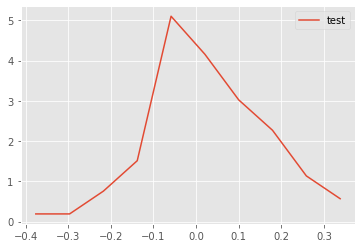

In [42]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    for k in range(n.size):
        pdfx[k] = 0.5*bins[k]+bins[k+1]
        pdfy[k] = n[k]
    
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()
plt.show()

## Add overlapping density plots to the histograms plotted earlier

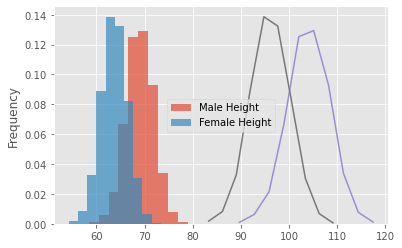

In [43]:
male_df.Height.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

## Repeat the above exercise for male and female weights

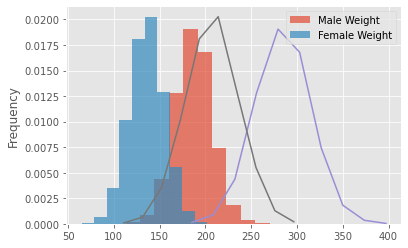

In [44]:
male_df.Weight.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ="Male Weight");
female_df.Weight.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Weight');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

## Write your observations in the cell below

In [45]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

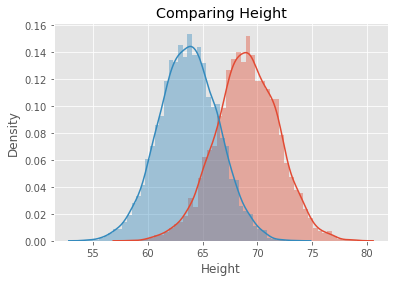

In [46]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title("Comparing Height")
plt.show()

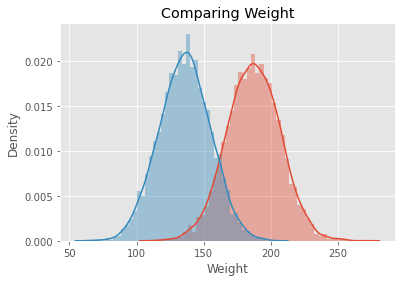

In [47]:
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title("Comparing Weight")
plt.show()

In [48]:
# Your comments on the two approaches here.
# Male heights are generally higher than female
# Male and Female heights avarages between 65 - 67 inches
# Both heights are normally distributed

# Male weight are generally heavier than female
# Male and Female weight avarages between 152 - 153 pounds
# Both weights are normally distributed

# are they similar? what makes them different if they are?
# They are similar.

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.